# Principal component analysis (PCA) and data compression

In this notebook we will use PCA to compress data in the MNIST-digit dataset.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
mnist = fetch_openml('mnist_784')
mnist.data.shape

/home/mgn/miniconda3/envs/dsml-py3.9/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/mgn/miniconda3/envs/dsml-py3.9/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


(70000, 784)

In [2]:
# Apply PCA to the dataset.
# Exercise: What is the parameter fraction doing and how does it differ from let's say n_components = 8?
fraction=0.6
pca = PCA(n_components=fraction)
projected_data = pca.fit_transform(mnist.data)
pca.n_components_

17

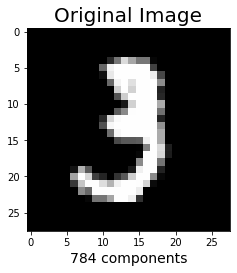

In [5]:
# Plot the original Image

A = mnist.data.to_numpy()

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(A[10].reshape(28,28),cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

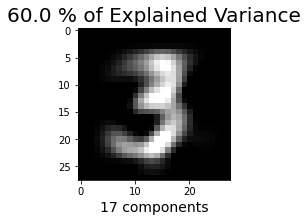

In [6]:
# Plot image after PCA compression
fuzzyfig = pca.inverse_transform(projected_data)
plt.subplot(1, 2, 2)
plt.imshow(fuzzyfig[10].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('{0} components'.format(pca.n_components_), fontsize = 14)
plt.title('{0:02.1f} % of Explained Variance'.format(fraction*100), fontsize = 20);

In [7]:
# Do the PCA-transform on test images only (else cheating)
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

# First we apply a standardscaler
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

# Then, do full PCA
pca = PCA()
pca.fit(train_img)
pca.n_components_

In [ ]:
# Plot explained variance when we keep different nr of PCA components
# The result will be different from before, because of the standardscaler
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
pca.explained_variance_

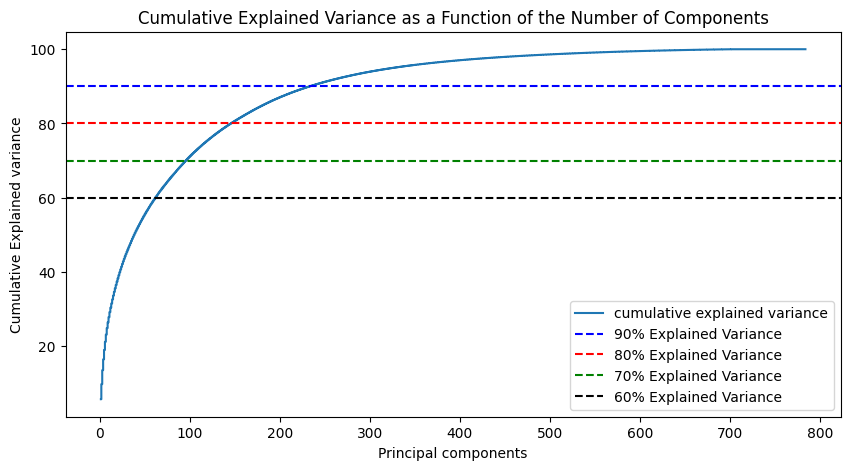

In [ ]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='b', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 80, color='r', linestyle='--', label = '80% Explained Variance')
plt.axhline(y = 70, color='g', linestyle='--', label = '70% Explained Variance')
plt.axhline(y = 60, color='k', linestyle='--', label = '60% Explained Variance')
plt.legend(loc='best')
plt.savefig('pcamnist01.pdf')
plt.show()

In [ ]:
# Lets see how logistic regression works on compressed images
# Try different values below on compression factor
# If we were clever, we could have reused the full PCA calculation from before
pca = PCA(.85)
pca.fit(train_img)
train_imgpca = pca.transform(train_img)
test_imgpca = pca.transform(test_img)
pca.n_components_

182

In [ ]:
# Define and fit a Logistic Regression classifier on PCA-compressed data.
logisticRegr = LogisticRegression(max_iter=10000,tol=0.001,verbose=1)
logisticRegr.fit(train_imgpca, train_lbl)

In [ ]:
# Evaluate
logisticRegr.score(test_imgpca, test_lbl)

LogisticRegression(max_iter=10000, tol=0.001, verbose=1)